## Salary Predition Problem

### Citions:
    
| First cited in:
| @inproceedings{kohavi-nbtree,
|    author={Ron Kohavi},
|    title={Scaling Up the Accuracy of Naive-Bayes Classifiers: a
|           Decision-Tree Hybrid},
|    booktitle={Proceedings of the Second International Conference on
|               Knowledge Discovery and Data Mining},
|    year = 1996,

### Prediction task is to determine whether a person makes over 50K a year.

#### Following are the columns
    - age                - relationship
    - workclass          - race
    - fnlwgt             - sex
    - education          - capital-gain
    - education-num      - capital-loss
    - marital-status     - hours-per-week
    - occupation         - native-country








Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the data

In [3]:
train_data = pd.read_csv("adult.data", header=None) #there are no headers, so header is False 

In [4]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Putting headers in the data

In [5]:
train_data.columns = ['age', 'workclass', 'no_of_people_corresponding_row', 'education', 'education-num', 'marital-status', 
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                'hours-per-week', 'native-country', 'salary']

In [6]:
train_data.head()

,age,workclass,no_of_people_corresponding_row,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Exploring the dataset

In [7]:
train_data.shape

(32561, 15)

In [8]:
train_data.isnull().sum()[train_data.isnull().sum() != 0] #show only the non zero count of null values

Series([], dtype: int64)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   age                             32561 non-null  int64 
 1   workclass                       32561 non-null  object
 2   no_of_people_corresponding_row  32561 non-null  int64 
 3   education                       32561 non-null  object
 4   education-num                   32561 non-null  int64 
 5   marital-status                  32561 non-null  object
 6   occupation                      32561 non-null  object
 7   relationship                    32561 non-null  object
 8   race                            32561 non-null  object
 9   sex                             32561 non-null  object
 10  capital-gain                    32561 non-null  int64 
 11  capital-loss                    32561 non-null  int64 
 12  hours-per-week                  32561 non-null

In [10]:
train_data.dtypes[train_data.dtypes == 'object'].index # these columns are object type or strings

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')

In [11]:
train_data.describe()

,age,no_of_people_corresponding_row,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
train_data['age'].value_counts() 

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: age, Length: 73, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

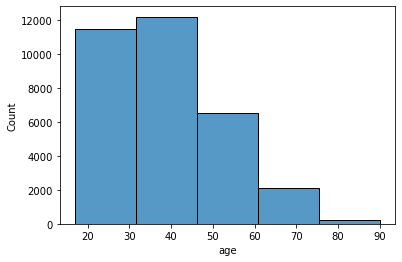

In [13]:
sns.histplot(data = train_data, x = 'age', bins = 5) # age group is concentrated between 15 to 45 yrs

<AxesSubplot:xlabel='age', ylabel='Count'>

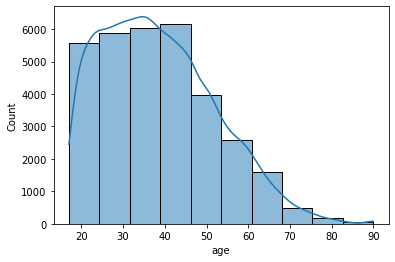

In [14]:
sns.histplot(data = train_data, x = 'age', bins = 10, kde=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

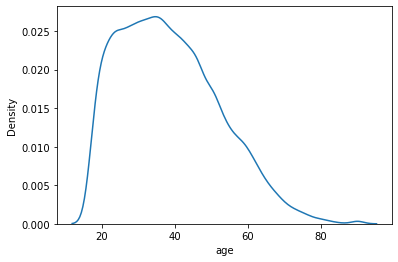

In [15]:
sns.kdeplot(data = train_data, x = 'age') # we have skewed data

<AxesSubplot:xlabel='age'>

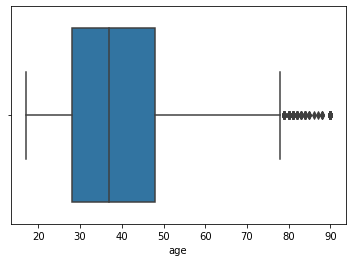

In [16]:
sns.boxplot(data=train_data, x = 'age')

In [17]:
train_data['age'] 

0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32561, dtype: int64

In [23]:
Q1 = train_data['age'].quantile(0.25)
Q3 = train_data['age'].quantile(0.75)

IQR = Q3 - Q1

lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

filtered = train_data.query('@lower_range <= age <= @upper_range')

In [25]:
filtered.shape

(32418, 15)

In [26]:
train_data.shape

(32561, 15)

<AxesSubplot:xlabel='age'>

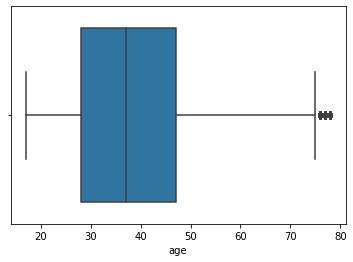

In [28]:
sns.boxplot(data = filtered, x = 'age')